<a href="https://colab.research.google.com/github/iamNirmeshGupta/Email-Spam-Detection/blob/main/Email_Spam_Detection_Nirmesh_Guptaipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# Importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report


import nltk
from nltk.corpus import stopwords
import string


In [74]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/alma better/Email Spam Detection/spam.csv", encoding = "ISO-8859-1")

In [75]:
# Dataset clumns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

**There are a few redundant columns in the dataset. Let's check dataset information.**

In [76]:
# Basic data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**Most of the observations present in the three unnamed columns are null. These columns will not be relevant for our model. So we can safely remove them.**

In [77]:
# Removing unnamed columns
df = df.loc[:,['v1','v2']]

In [78]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


##**Data Cleaning**

In [79]:
# Checking for null values
df.isnull().sum()

v1    0
v2    0
dtype: int64

**There are null values present in the dataset.**

In [80]:
#Checking duplicate records
df.duplicated().sum()

403

**There are 403 duplicate records in the dataset. We ca remove these duplicate records.**

In [81]:
# Removing duplicate records
df.drop_duplicates(keep='first', inplace=True)

In [82]:
df.duplicated().sum()

0

In [83]:
# Renaming columns 
df.rename(columns={'v1':'category','v2':'messege'}, inplace=True)

In [84]:
df.columns

Index(['category', 'messege'], dtype='object')

In [85]:
# Checking class distribution
df['category'].value_counts()

ham     4516
spam     653
Name: category, dtype: int64

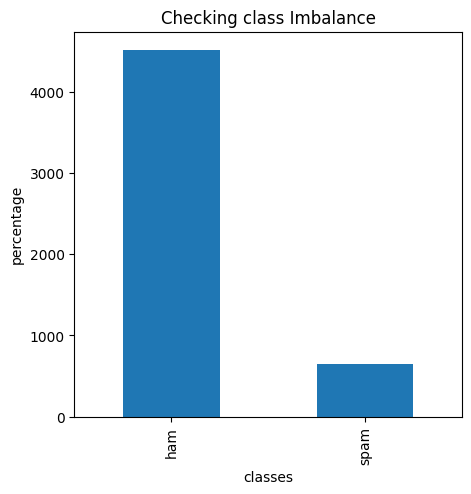

In [86]:
# Plotting class distribution
class_imb = df['category'].value_counts()
plt.figure(figsize=(5,5))
class_imb.plot(kind='bar')
plt.title('Checking class Imbalance')
plt.xlabel('classes')
plt.ylabel('percentage')
plt.show()


In [87]:
# Assigning instances of 'spam' as 1 and other as 0
df['category'] = df['category'].apply(lambda x:1 if x=='spam' else 0 )

In [88]:
df.head()

,category,messege
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


##**Text Preprocessing**

In [89]:
# download the stopwords package
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
# Function to preprocess text
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean
# to show the tokenization
df['messege'].head().apply(process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messege, dtype: object

In [91]:
# Transforming processes text into vector
from sklearn.feature_extraction.text import CountVectorizer
text = CountVectorizer(analyzer=process).fit_transform(df['messege'])

##**Data Modelling**

In [92]:
#split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(text, df['category'], test_size=0.20, random_state=0)
# To see the shape of the data
print(text.shape)

(5169, 11304)


In [93]:
# create and train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(xtrain, ytrain)


In [94]:
print(classifier.predict(xtrain))
print(ytrain.values)


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


##**Model Evaluation**

In [95]:
# Evaluating the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtrain)
print(classification_report(ytrain, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytrain, pred))
print("Accuracy: \n", accuracy_score(ytrain, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3631
           1       0.98      0.98      0.98       504

    accuracy                           1.00      4135
   macro avg       0.99      0.99      0.99      4135
weighted avg       1.00      1.00      1.00      4135


Confusion Matrix: 
 [[3623    8]
 [  11  493]]
Accuracy: 
 0.9954050785973397


**The model has performed well on the train dataset with accuracy of 99%. Let's how it performs on the test data.**

In [96]:
#print the predictions
print(classifier.predict(xtest))
#print the actual values
print(ytest.values)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [97]:
# Evaluating the model on the test data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(xtest)
print(classification_report(ytest, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
print("Accuracy: \n", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       885
           1       0.80      0.93      0.86       149

    accuracy                           0.96      1034
   macro avg       0.89      0.94      0.92      1034
weighted avg       0.96      0.96      0.96      1034


Confusion Matrix: 
 [[850  35]
 [ 11 138]]
Accuracy: 
 0.9555125725338491


**The model has performed on test data as well with accuracy of 95%. Let us check for roc_auc_score for the test data, which is a better indicator of performance for imbalanced data.**

###**ROC_AUC_SCORE**

In [71]:
# roc_auc_score for test data
print("ROC_AUC_SCORE: \n", roc_auc_score(ytest,pred))

ROC_AUC_SCORE: 
 0.9433132370227126


**We have built a strong classifier which is able to distinguish between spam and ham messeges with an roc_auc of 94%.**

##**Conclusion** \

 **- Successfully built a classification model, which can distinguish between 'spam' and 'ham' messeges with high accuracy.**